In [1]:
%matplotlib nbagg
%load_ext autoreload
%autoreload 2

from ProbabilisticDynamicsModel import *
from utils import *
import gym

/usr/local/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
env = gym.make('MountainCarContinuous-v0')

[2017-07-27 15:54:45,222] Making new env: MountainCarContinuous-v0


# Training the PDM
We randomly sample the state space of the problem for training data. However, rather than sampling the entire state space, we limit the sampling to within $x$ from $[-0.5, -0.5]$ to $[0.0,0.5]$, and $u$ from $[-0.2]$ to $[0.2]$

In [3]:
transitions = sample_transitions(env, [-0.6,-0.07], [-0.2,0.07], [-0.5], [0.5], 5000)

In [4]:
x_dim = transitions["x"].shape[1]
u_dim = transitions["u"].shape[1]

In [5]:
run_config = tf.ConfigProto()
run_config.gpu_options.allow_growth = True
sess = tf.Session(config = run_config)

pdm = NonlinearPDM(sess, x_dim, u_dim,
                       hidden_layer_sizes=[128, 128, 128],
                       dropout_prob=0.1,
                       num_mc_samples=50,
                       filename='test_nl_3layer_with_len1_fixed_reg0.5',
                       writer_path='tf_logs')
pdm.build_model()

layer 0, shape [None, None, 128]
layer 1, shape [None, None, 128]
layer 2, shape [None, None, 128]


In [6]:
cfg = MLP_DM_cfg
cfg["lr"] = 7e-3
cfg["batch_size"] = 100
cfg["n_epochs"] = 100
cfg["store_val"] = True
with sess.as_default():
    pdm.train(transitions, cfg)

Training with 3500 input/target pairs.
Epoch: [ 0] [   0/  35] time: 0.1630, train_loss: -4.83198118, val_loss: -4.45661736
Saving checkpoint
Epoch: [ 0] [  10/  35] time: 1.3677, train_loss: -4.41209555, val_loss: -5.36996698
Epoch: [ 0] [  20/  35] time: 1.6361, train_loss: -8.13310337, val_loss: -8.71563339
Epoch: [ 0] [  30/  35] time: 1.8850, train_loss: -9.75884724, val_loss: -6.77311325
Epoch: [ 1] [   0/  35] time: 2.0039, train_loss: -7.32040119, val_loss: -8.80880260
Epoch: [ 1] [  10/  35] time: 2.2494, train_loss: -9.70565796, val_loss: -9.14854622
Epoch: [ 1] [  20/  35] time: 2.5005, train_loss: -10.05992222, val_loss: -9.80212307
Epoch: [ 1] [  30/  35] time: 2.7682, train_loss: -9.78401184, val_loss: -9.75719357
Epoch: [ 2] [   0/  35] time: 2.8944, train_loss: -10.20582485, val_loss: -10.00378609
Epoch: [ 2] [  10/  35] time: 3.1694, train_loss: -10.21667385, val_loss: -9.85758495
Epoch: [ 2] [  20/  35] time: 3.4200, train_loss: -10.02086544, val_loss: -10.02889729
Ep

# Testing the Learned Model
We test the model on a slice of the state space, namely with $x_1$ fixed to a value, and with $u=0.2$, over $x_0$ from -1 to 1. 

<IPython.core.display.Javascript object>


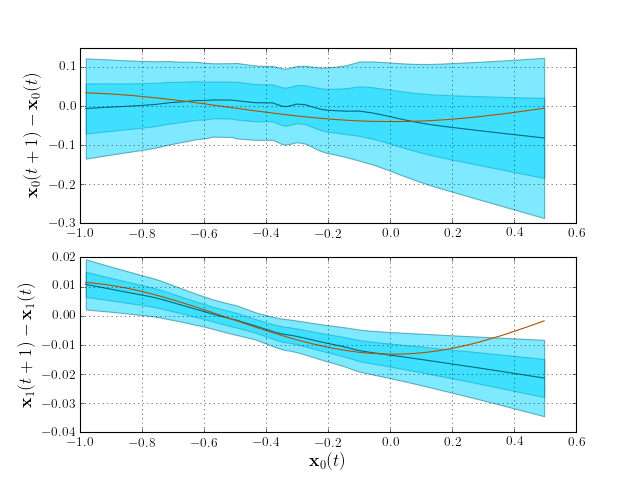

In [7]:
x_range = np.array([[-1, 0.0],[0.5, 0.0]])
u_range = np.array([[-0.1], [-0.1]])
sample_and_plot_results(env, pdm, x_range, u_range)

<IPython.core.display.Javascript object>


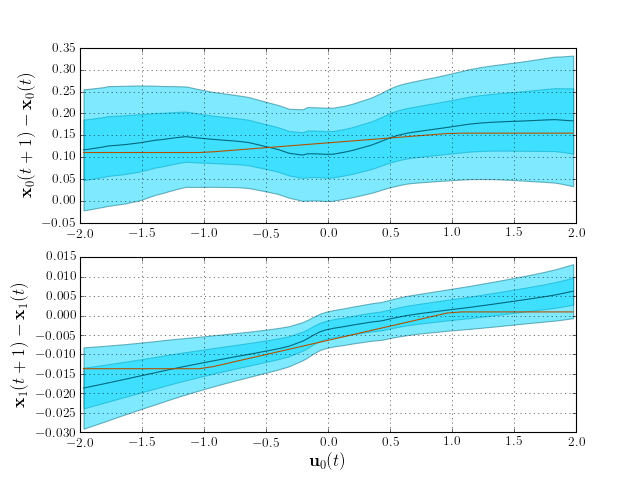

In [8]:
x_range = np.array([[-0.4, 0.03],[-0.4, 0.03]])
u_range = np.array([[-2], [2]])
sample_and_plot_results(env, pdm, x_range, u_range)

<IPython.core.display.Javascript object>


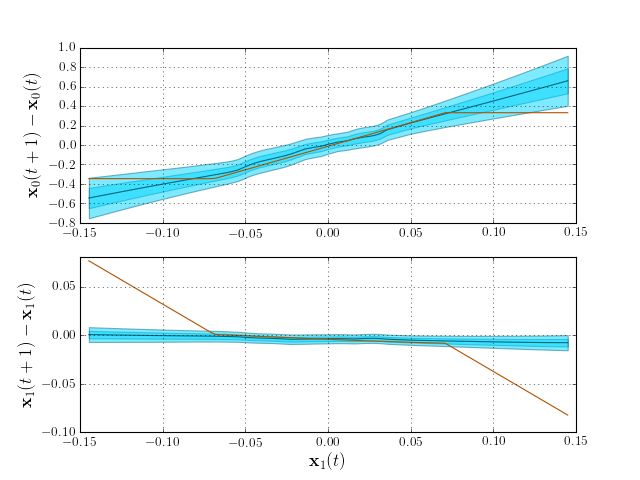

In [9]:
x_range = np.array([[-0.4, -0.15],[-0.4, 0.15]])
u_range = np.array([[-0.0], [-0.0]])
sample_and_plot_results(env, pdm, x_range, u_range)